# imports

In [46]:
import pandas as pd
import requests
from scipy import stats
import numpy as np

# get data

In [8]:
API_KEY = "3856b633126e4a27b2e45516c9290395"
URL = f"https://api.covidactnow.org/v2/states.timeseries.csv?apiKey={API_KEY}"
PATH = "data/states_series.csv"

r = requests.get(URL)

with open(PATH, 'w') as f:
    f.write(r.text)

# import data

In [40]:
data = pd.read_csv(PATH)

# process data

In [41]:
# get only from Colorado
state = 'CO'
data = data[data['state'] == state]
# get dates in range 01/03/2020 to 26/09/2021
date_start = '2020-03-01'
date_stop = '2021-09-26'
data = data[(data['date']>=date_start) & (data['date']<=date_stop)]
data

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,unused3,unused4,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel
3118,2020-03-01,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
3119,2020-03-02,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
3120,2020-03-03,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
3121,2020-03-04,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
3122,2020-03-05,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,2.0,0.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,2021-09-22,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,660023.0,7619.0,...,NaN,NaN,0.76,3,0.651,0.588,14.0,7075401.0,3,3
3689,2021-09-23,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,662451.0,7634.0,...,NaN,NaN,0.75,3,0.651,0.589,15.0,7086638.0,3,3
3690,2021-09-24,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,664010.0,7648.0,...,NaN,NaN,0.76,3,0.652,0.590,14.0,7100573.0,3,3
3691,2021-09-25,US,CO,NaN,8,NaN,NaN,iso1:us#iso2:us-co,664396.0,7649.0,...,NaN,NaN,0.75,3,0.653,0.590,1.0,7111715.0,3,3


<AxesSubplot:ylabel='Frequency'>

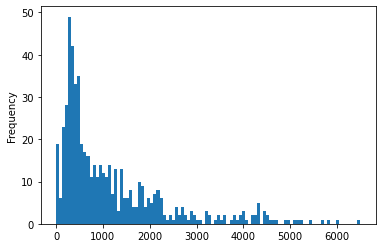

In [45]:
data['actuals.newCases'].plot.hist(bins=100)

In [48]:
z = np.abs(stats.zscore(data['actuals.newCases']))
z

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

# plot data

<AxesSubplot:xlabel='date'>

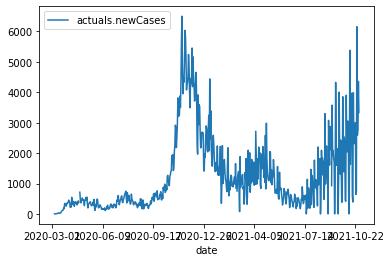

In [13]:
data.plot(x='date', y='actuals.newCases')